In [2]:
!wget -c https://i.imgur.com/K74Rsq2.jpg -O painting.jpg
!wget -c https://i.imgur.com/HnwPrgi.jpg -O painting_in_life.jpg

--2021-03-17 09:46:35--  https://i.imgur.com/K74Rsq2.jpg
Resolving i.imgur.com (i.imgur.com)... 199.232.64.193
Connecting to i.imgur.com (i.imgur.com)|199.232.64.193|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2021-03-17 09:46:35--  https://i.imgur.com/HnwPrgi.jpg
Resolving i.imgur.com (i.imgur.com)... 199.232.64.193
Connecting to i.imgur.com (i.imgur.com)|199.232.64.193|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

In [4]:
img1 = cv.imread('painting.jpg', cv.IMREAD_GRAYSCALE)  # queryImage
img2 = cv.imread('painting_in_life.jpg', cv.IMREAD_GRAYSCALE)  # trainImage

In [5]:
# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [ ]:
# create BFMatcher object
# bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
# matches = bf.match(des1, des2)

In [6]:
def hamdist(x, y):
    diffs = 0

    if len(x) != len(y):
        return max(len(x), len(y))

    for ch1, ch2 in zip(x, y):
        if ch1 != ch2:
            diffs += 1

    return diffs


matches = []
for i, k1 in enumerate(des1):
    for j, k2 in enumerate(des2):
        matches.append(cv.DMatch(_distance=hamdist(k1, k2), _imgIdx=0, _queryIdx=i, _trainIdx=j))

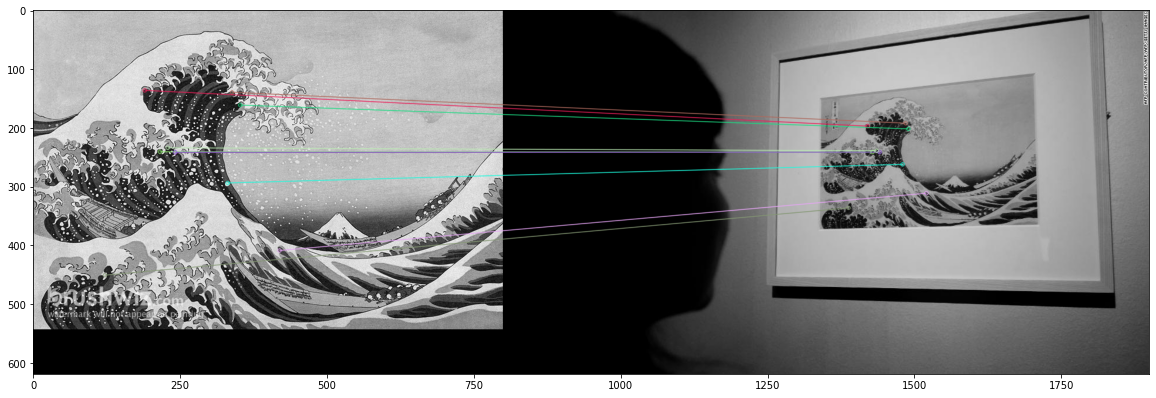

(<matplotlib.image.AxesImage at 0x7f76de412f90>, None)

In [7]:
# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 10 matches.
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.rcParams['figure.figsize'] = [20, 16]
plt.imshow(img3), plt.show()